In [1]:
# importing required libraries
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
train_df = pd.read_csv('beans.csv')

## EDA

In [3]:
train_df.isna().sum()

Area                  0
Perimeter             0
MajorAxisLength       0
MinorAxisLength    1034
AspectRation          0
Eccentricity          0
ConvexArea          803
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness        1388
ShapeFactor1        531
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4       1048
Class                 0
dtype: int64

In [4]:
train_df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea         float64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

<Axes: xlabel='Area', ylabel='Count'>

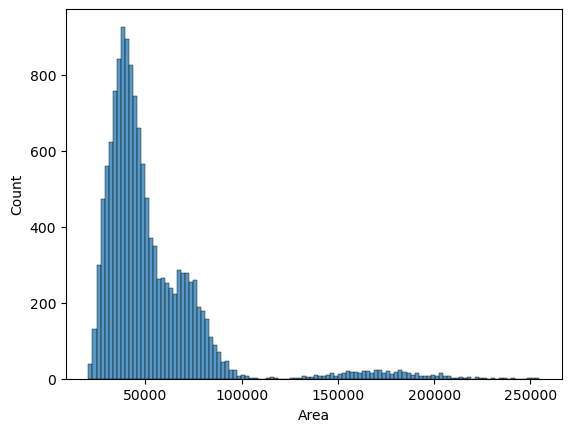

In [5]:
sns.histplot(train_df['Area'])

Conclusion: the above graph is right-skewed. Outliers are present in this graph.

<Axes: xlabel='Perimeter', ylabel='Count'>

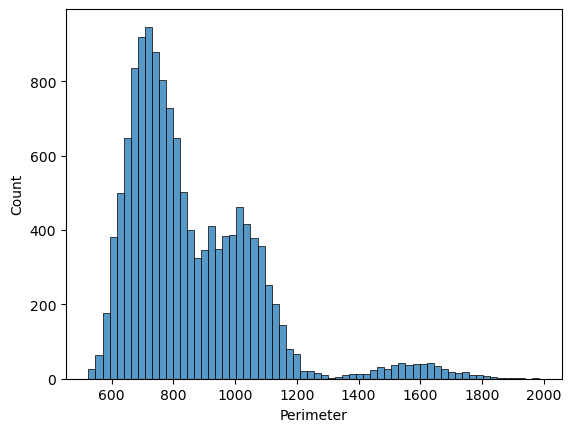

In [6]:
sns.histplot(train_df['Perimeter'])

Conclusion: the above graph is right-skewed. Few Outliers are present in this graph.

<Axes: xlabel='MajorAxisLength', ylabel='Count'>

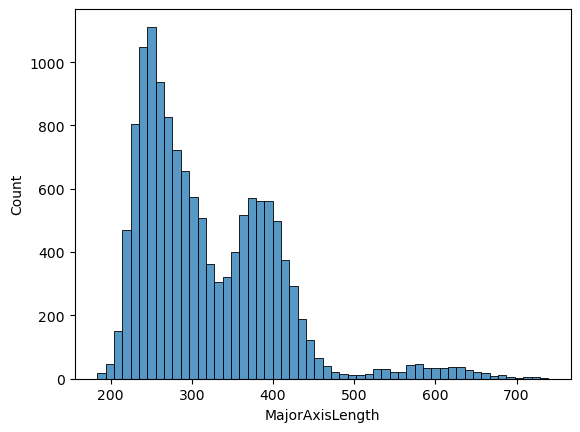

In [7]:
sns.histplot(train_df['MajorAxisLength'])

In [85]:
Conclusion: the above graph is right-skewed. Few Outliers are present in this graph.

SyntaxError: invalid syntax (1758730772.py, line 1)

<Axes: xlabel='MinorAxisLength', ylabel='Count'>

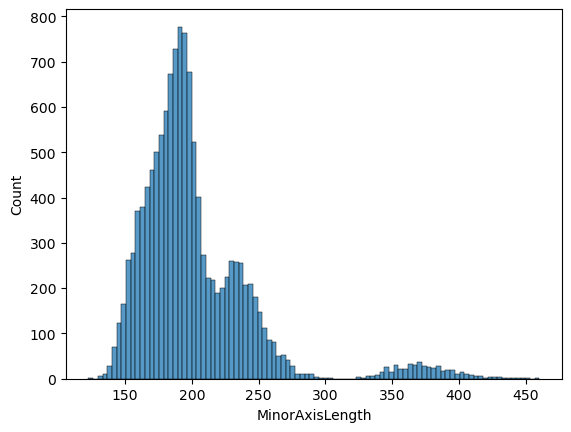

In [8]:
sns.histplot(train_df['MinorAxisLength'])

Conclusion: the above graph is right-skewed. Few Outliers are present in this graph.

<Axes: xlabel='AspectRation', ylabel='Count'>

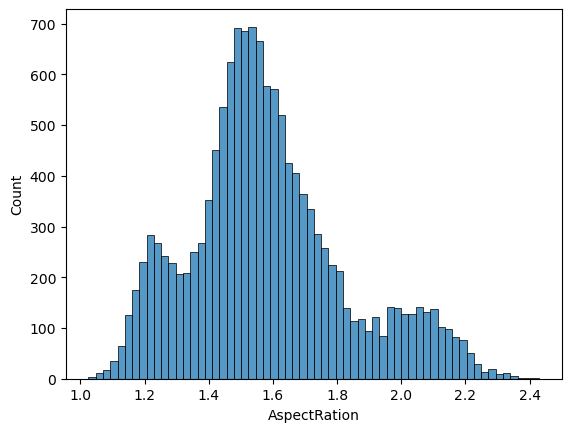

In [9]:
sns.histplot(train_df['AspectRation'])

<Axes: xlabel='Eccentricity', ylabel='Count'>

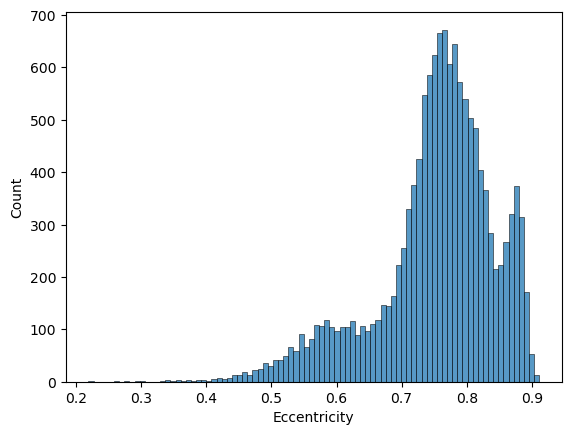

In [10]:
sns.histplot(train_df['Eccentricity'])

<Axes: xlabel='ConvexArea', ylabel='Count'>

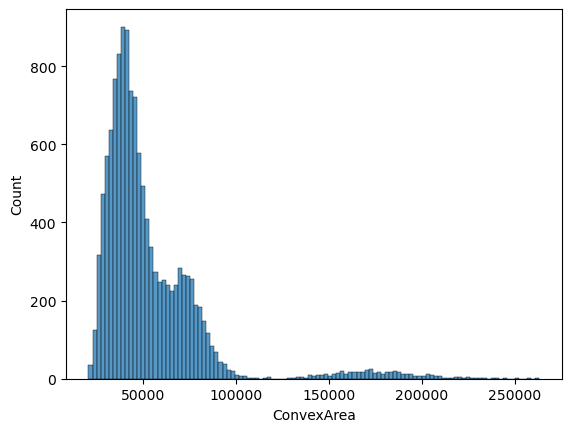

In [11]:
sns.histplot(train_df['ConvexArea'])

Conclusion: ConvexArea's graph is right-skewed. Outliers are present in this graph. Hence, missing values will be filled by median.

<Axes: xlabel='EquivDiameter', ylabel='Count'>

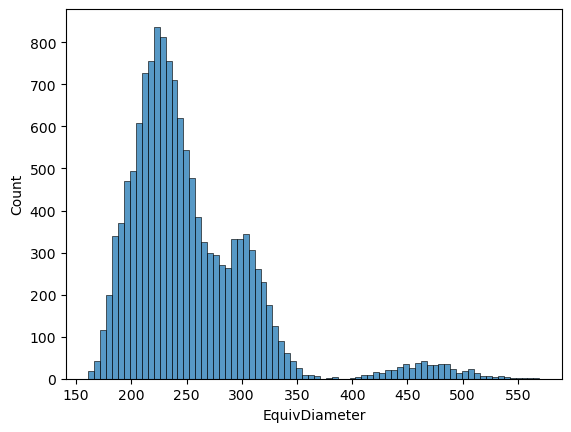

In [12]:
sns.histplot(train_df['EquivDiameter'])

<Axes: xlabel='Extent', ylabel='Count'>

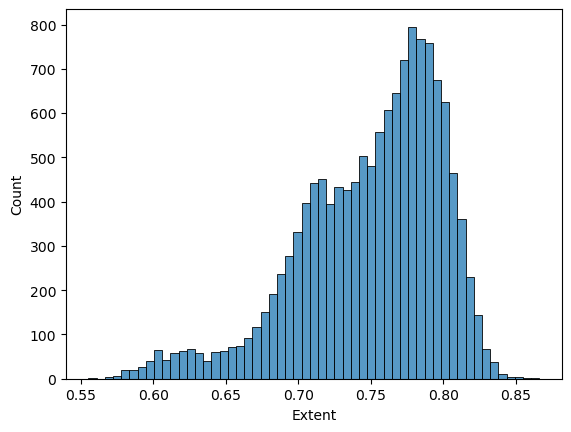

In [13]:
sns.histplot(train_df['Extent'])

<Axes: xlabel='Solidity', ylabel='Count'>

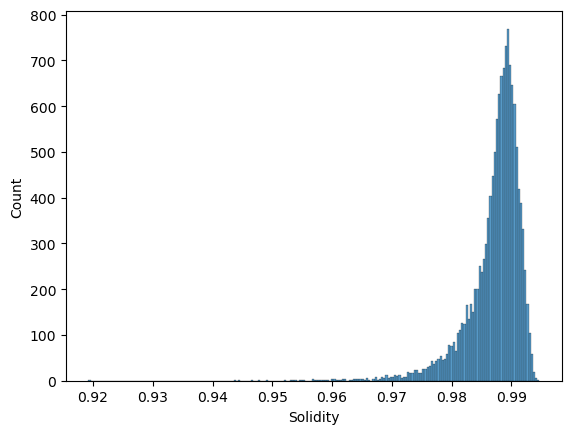

In [14]:
sns.histplot(train_df['Solidity'])

Conclusion: Solidity's graph is left-skewed. Outliers are present in this graph.

<Axes: xlabel='roundness', ylabel='Count'>

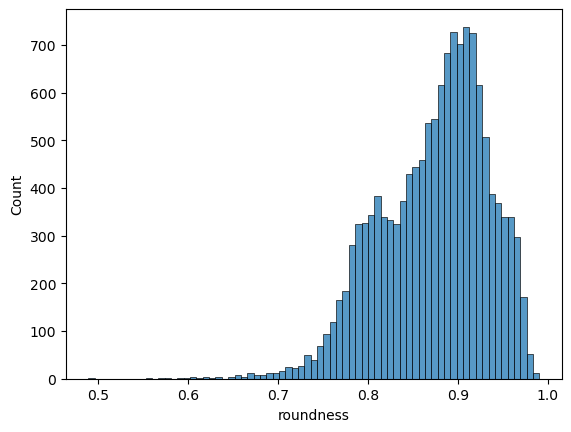

In [15]:
sns.histplot(train_df['roundness'])

<Axes: xlabel='Compactness', ylabel='Count'>

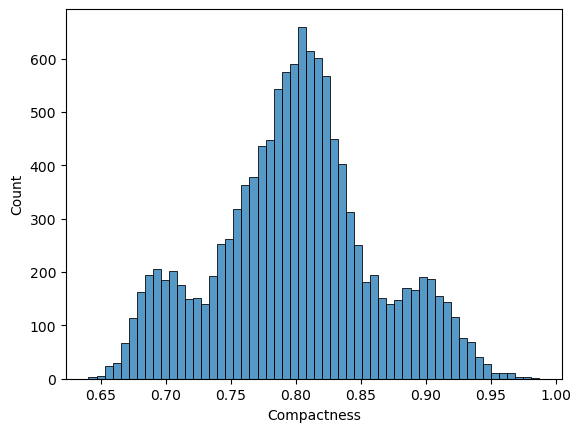

In [16]:
sns.histplot(train_df['Compactness'])

<Axes: xlabel='ShapeFactor1', ylabel='Count'>

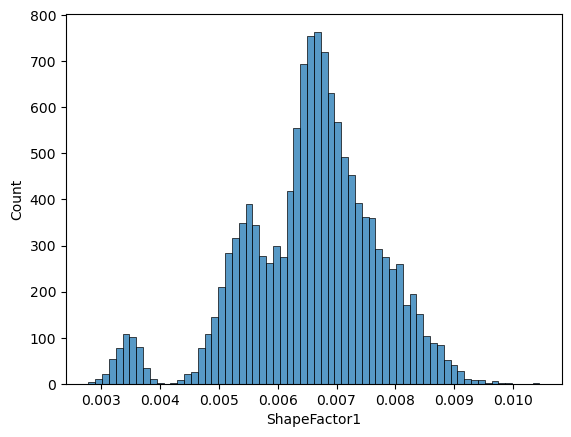

In [17]:
sns.histplot(train_df['ShapeFactor1'])

<Axes: xlabel='ShapeFactor2', ylabel='Count'>

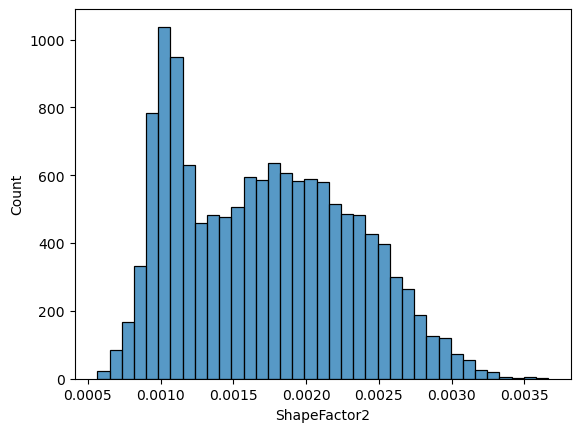

In [18]:
sns.histplot(train_df['ShapeFactor2'])

<Axes: xlabel='ShapeFactor3', ylabel='Count'>

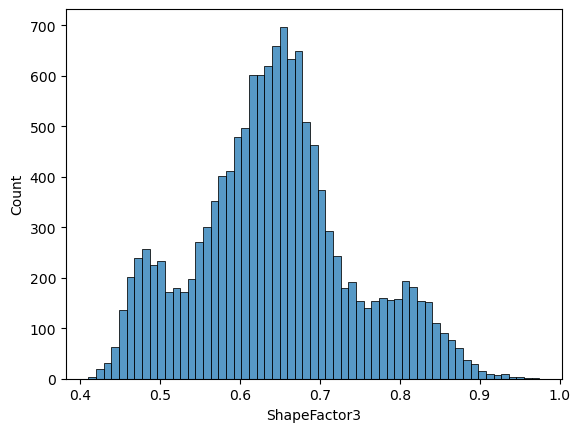

In [19]:
sns.histplot(train_df['ShapeFactor3'])

<Axes: xlabel='ShapeFactor4', ylabel='Count'>

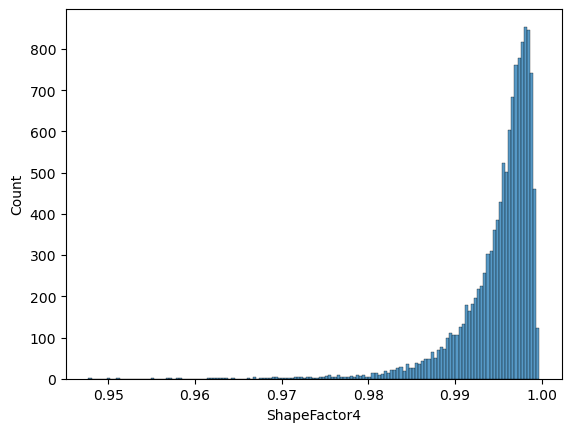

In [20]:
sns.histplot(train_df['ShapeFactor4'])

Conclusion: ShapeFactor4's graph is left-skewed. Outliers are present in this graph. Hence, missing values will be filled by median.

One-Hot Encoding of Target variable

In [21]:
encoded_df = pd.get_dummies(train_df, columns=['Class'])
encoded_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,...,0.003147,0.834222,0.998724,False,False,False,False,False,True,False
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,...,0.003564,0.909851,0.998430,False,False,False,False,False,True,False
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,...,0.003048,0.825871,0.999066,False,False,False,False,False,True,False
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,...,0.003215,0.861794,0.994199,False,False,False,False,False,True,False
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,...,0.003665,0.941900,0.999166,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,NaN,231.515799,0.714574,0.990331,...,0.001749,0.642988,0.998385,False,False,False,True,False,False,False
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,NaN,231.526798,0.799943,0.990752,...,0.001886,0.676099,0.998219,False,False,False,True,False,False,False
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,...,0.001888,0.676884,0.996767,False,False,False,True,False,False,False
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,...,0.001852,0.668237,0.995222,False,False,False,True,False,False,False


<Axes: >

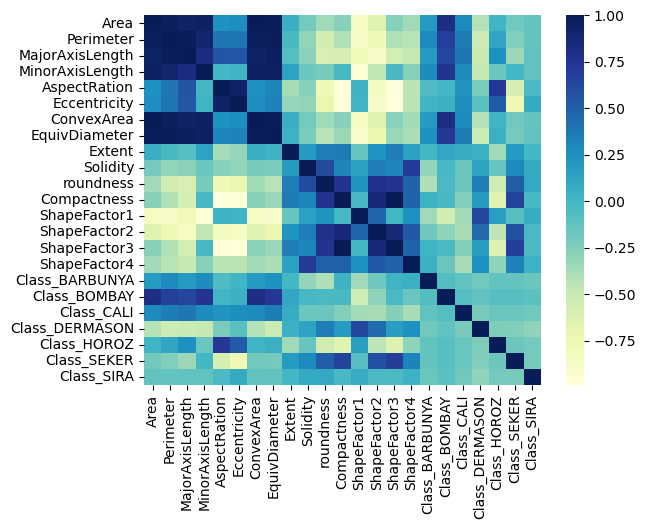

In [22]:
sns.heatmap(encoded_df.corr(), cmap="YlGnBu") 

In [23]:
encoded_df.describe(include="all")

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
count,13611.000000,13611.000000,13611.000000,12577.000000,13611.000000,13611.000000,12808.000000,13611.000000,13611.000000,13611.000000,...,13611.000000,13611.000000,12563.000000,13611,13611,13611,13611,13611,13611,13611
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12289,13089,11981,10065,11683,11584,10975
mean,53048.284549,855.283459,320.141867,202.295543,1.583242,0.750895,53726.689413,253.064220,0.749733,0.987143,...,0.001716,0.643590,0.995069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,29324.095717,214.289696,85.694186,45.044880,0.246678,0.092002,29842.557030,59.177120,0.049086,0.004660,...,0.000596,0.098996,0.004339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,...,0.000564,0.410339,0.947687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,36328.000000,703.523500,253.303633,175.755083,1.432307,0.715928,36684.750000,215.068003,0.718634,0.985670,...,0.001154,0.581359,0.993701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,44652.000000,794.941000,296.883367,192.426897,1.551124,0.764441,45106.000000,238.438026,0.759859,0.988283,...,0.001694,0.642044,0.996380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,61332.000000,977.213000,376.495012,217.081036,1.707109,0.810466,62307.000000,279.446467,0.786851,0.990013,...,0.002170,0.696006,0.997886,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Handling Missing values

In [24]:
def calcMinorAxisLength(majorAxisLength,aspectRation):
    return majorAxisLength/aspectRation

In [25]:
def calcCompactness(equivDiameter,majorAxisLength):
    return equivDiameter/majorAxisLength

In [26]:
for row in train_df['MinorAxisLength'].isna():
    train_df['MinorAxisLength'] = calcMinorAxisLength(train_df['MajorAxisLength'],train_df['AspectRation'])

In [27]:
for row in train_df['Compactness'].isna():
    train_df['Compactness'] = calcMinorAxisLength(train_df['EquivDiameter'],train_df['MajorAxisLength'])

In [28]:
train_df['ConvexArea'].fillna(train_df['ConvexArea'].median(),inplace=True)
train_df['ShapeFactor1'].fillna(train_df['ShapeFactor1'].median(),inplace=True)
train_df['ShapeFactor4'].fillna(train_df['ShapeFactor4'].median(),inplace=True)

### Dealing with outliers

Normalizing the data to deal with outliers

In [29]:
X = train_df.drop('Class',axis=1)

In [30]:
y = train_df['Class']

In [31]:
type(y)

pandas.core.series.Series

In [32]:
y = pd.DataFrame(y)

In [33]:
scaler = StandardScaler()
# transform data
X = scaler.fit_transform(X)

In [34]:
X[0]

array([-0.84074853, -1.1433189 , -1.30659814, -0.63115304, -1.56505251,
       -2.18572039, -0.84438365, -1.0633406 ,  0.28908744,  0.36761343,
        1.42386707,  1.8391164 ,  0.68987084,  2.40217287,  1.92572347,
        0.84952278])

### Transforming the data

In [35]:
X = pd.DataFrame(X,columns=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'])

In [36]:
train_df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [37]:
# Transforming the target variable "Class"
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
y['Class']= label_encoder.fit_transform(y['Class']) 

In [38]:
y

,Class
0,5
1,5
2,5
3,5
4,5
...,...
13606,3
13607,3
13608,3
13609,3


### Splitting the data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True) 

### Applying linear model with regularization

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score

In [41]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [57]:
ridge = Ridge(alpha=.3,solver="sag")
ridge.fit(X_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=0.3, solver='sag')

### Applying Bagging model - Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
model2 = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

model2.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

### Applying Boosting Model - XGBoost

In [47]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 812.7 kB/s eta 0:02:03
   ---------------------------------------- 0.3/99.8 MB 2.3 MB/s eta 0:00:45
   ---------------------------------------- 0.3/99.8 MB 2.1 MB/s eta 0:00:48
   ---------------------------------------- 0.3/99.8 MB 2.1 MB/s eta 0:00:48
   ---------------------------------------- 0.4/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.6/99.8 MB 1.9 MB/s eta 0:00:53
   ---------------------------------------- 0.8/99.8 MB 2.4 MB/s eta 0:00:42
   ---------------------------------------- 0.8/99.8 MB 2.4 MB/s eta 0:00:42
   ----------------------------------

In [60]:
from xgboost import XGBClassifier

In [80]:
model3 = XGBClassifier(random_state=13)
model3.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Creating a stacking classifier

In [81]:
estimators = []
estimators.append(("Linear Classifier",model1))
estimators.append(("Ridge Classifier",ridge))
estimators.append(("Random Forest Classifier",model2))
estimators.append(("XGBoost Classifier",model3))

In [82]:
XGB = XGBClassifier(random_state=13)

In [71]:
from sklearn.ensemble import StackingClassifier

In [83]:
SC = StackingClassifier(estimators=estimators,final_estimator=XGB,cv=6)
SC.fit(X_train, y_train)
y_pred = SC.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning

In [84]:
f1_score(y_pred,y_test,average=None)

array([0.9244713 , 0.996139  , 0.94567901, 0.91625069, 0.95277207,
       0.94811801, 0.86692015])

### After hyperparameter tuning, the final f1_score is given above.